In [ ]:
!pip install simpletransformers
!pip install transformers

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf

# Get the GPU device name.
device_name = tf.test.gpu_device_name()

# The device name should look like the following:
if device_name == '/device:GPU:0':
    print('Found GPU at: {}'.format(device_name))
else:
    raise SystemError('GPU device not found')

Found GPU at: /device:GPU:0


In [ ]:
project_path='/content/drive/MyDrive/Colab Notebooks/fake-news/'

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# df=pd.read_csv(project_path+'kaggle_clean.csv')

df=pd.read_csv(project_path+'kaggle_clean_only_true_false.csv').rename({'new_labels_1':'new_labels'},axis=1)

# df=pd.read_csv(project_path+'kaggle_clean_only_true_false_balanced.csv').rename({'new_labels_1':'new_labels'},axis=1))


df.head()

,cleanText,Link_Of_News,Source,Stated_On,Date,new_labels
0,says osama bin laden endorsed joe biden,https://www.politifact.com/factchecks/2020/jun...,Donald Trump Jr.,"June 18, 2020","June 19, 2020",0
1,says tim tebow kneeled in protest of abortion ...,https://www.politifact.com/factchecks/2020/jun...,Facebook posts,"June 12, 2020","June 19, 2020",0
2,our health department our city and our county ...,https://www.politifact.com/factchecks/2020/jun...,Jeanette Kowalik,"June 14, 2020","June 18, 2020",1
3,californias registered independent voters will...,https://www.politifact.com/factchecks/2020/jun...,Facebook posts,"June 6, 2020","June 18, 2020",0
4,antifa now banging on residents doors in seatt...,https://www.politifact.com/factchecks/2020/jun...,Facebook posts,"June 14, 2020","June 18, 2020",0


In [ ]:

X_train, X_test, y_train, y_test = train_test_split(df['cleanText'], df['new_labels'], test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, random_state=42) # 


In [ ]:
train_df = pd.DataFrame({'text':X_train.values,'labels':y_train.values})
val_df = pd.DataFrame({'text':X_val.values,'labels':y_val.values})
test_df = pd.DataFrame({'text':X_test.values,'labels':y_test.values})

In [ ]:
print('Training sample: ' + str(len(train_df['text'])))
print('Validation sample: ' + str(len(val_df['text'])))
print('Testing sample: ' + str(len(test_df['text'])))

Training sample: 2249
Validation sample: 398
Testing sample: 662


In [ ]:
import os
os.makedirs(project_path+'Transformer/output/',exist_ok=True)

In [ ]:
model_type = "roberta"
model_name = "roberta-base"


train_args = {
    "reprocess_input_data": True,
    "overwrite_output_dir": True,
    "use_cached_eval_features": True,
    "output_dir": project_path+"Transformer/output/"+model_type,
    "best_model_dir": project_path+"Transformer/output/"+model_type+"/best_model",
    "use_early_stopping": False,
    "early_stopping_delta": 0.0,
    "early_stopping_metric": "eval_loss",
    "early_stopping_metric_minimize" : True,
    "early_stopping_patience" : 2,
    "evaluate_during_training": True,
    "max_seq_length": 512,
    "num_train_epochs": 10,
    "evaluate_during_training_steps": 512,
    "wandb_project": "Fake News Fulltrain_1 RoBERTa",
    "wandb_kwargs": {"name": model_name},
    "save_model_every_epoch": False,
    "save_eval_checkpoints": False,
    "train_batch_size": 64,
    "eval_batch_size": 64,
    "evaluate_during_training_verbose" : True
}

In [ ]:
# Below step requires https://wandb.ai/authorize account. Login use github is suggested.

In [ ]:
from simpletransformers.classification import ClassificationModel, ClassificationArgs
import sklearn

train_args["max_seq_length"] = 300
train_args["train_batch_size"] = 32
train_args["gradient_accumulation_steps"] = 2
train_args["evaluate_during_training"] = True
train_args["evaluate_during_training_steps"] = 1989
train_args["use_early_stopping"] = True


# Create a ClassificationModel
model = ClassificationModel(model_type, model_name, args=train_args)

# Train the model
history = model.train_model(train_df, eval_df=val_df,acc=sklearn.metrics.accuracy_score)

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.weight', 'lm_head.dense.weight', 'roberta.pooler.dense.bias', 'lm_head.dense.bias', 'lm_head.layer_norm.bias', 'lm_head.bias', 'lm_head.layer_norm.weight', 'lm_head.decoder.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.

  0%|          | 0/2249 [00:00<?, ?it/s]

Epoch:   0%|          | 0/10 [00:00<?, ?it/s]

Running Epoch 0 of 10:   0%|          | 0/71 [00:00<?, ?it/s]

Running Epoch 1 of 10:   0%|          | 0/71 [00:00<?, ?it/s]

Running Epoch 2 of 10:   0%|          | 0/71 [00:00<?, ?it/s]

Running Epoch 3 of 10:   0%|          | 0/71 [00:00<?, ?it/s]

Running Epoch 4 of 10:   0%|          | 0/71 [00:00<?, ?it/s]

Running Epoch 5 of 10:   0%|          | 0/71 [00:00<?, ?it/s]

Running Epoch 6 of 10:   0%|          | 0/71 [00:00<?, ?it/s]

Running Epoch 7 of 10:   0%|          | 0/71 [00:00<?, ?it/s]

Running Epoch 8 of 10:   0%|          | 0/71 [00:00<?, ?it/s]

Running Epoch 9 of 10:   0%|          | 0/71 [00:00<?, ?it/s]

In [69]:
result, model_outputs, wrong_predictions = model.eval_model(val_df)

Running Evaluation:   0%|          | 0/7 [00:00<?, ?it/s]

In [70]:
predictions, raw_outputs = model.predict(test_df['text'])

  0%|          | 0/7 [00:00<?, ?it/s]

In [71]:
from sklearn.metrics import accuracy_score
print(accuracy_score(test_df['labels'],predictions))

0.620845921450151


In [72]:
import os
os.makedirs(project_path+'Predictions',exist_ok=True)

In [73]:
import pickle
with open(project_path+'Predictions/pickle_Pred_Roberta_1_CC.pickle', 'wb') as f:
  pickle.dump((test_df['labels'],predictions),f)


In [74]:
import pickle
with open(project_path+'Predictions/pickle_Pred_Roberta_1_CC.pickle', 'rb') as f:
  y_true, y_pred = pickle.load(f)

In [75]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_true, y_pred))

0.620845921450151


In [76]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, zero_division=0))

              precision    recall  f1-score   support

           0       0.70      0.79      0.74       463
           1       0.32      0.23      0.27       199

    accuracy                           0.62       662
   macro avg       0.51      0.51      0.51       662
weighted avg       0.59      0.62      0.60       662



In [77]:
import matplotlib.pyplot as plt

In [78]:
history = history[1]

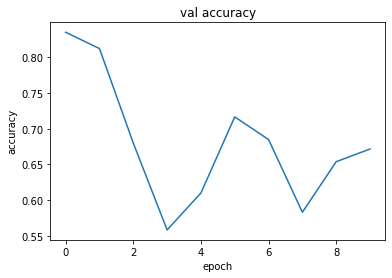

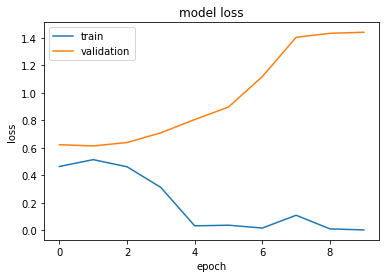

In [79]:
total_pos = np.array(history['tp'])+np.array(history['tn'])
total_neg = np.array(history['fp'])+np.array(history['fp'])
acc = total_pos/(total_pos+total_neg)

# plt.plot(history['acc'])
plt.plot(acc)
plt.title('val accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
# plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history['train_loss'])
plt.plot(history['eval_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

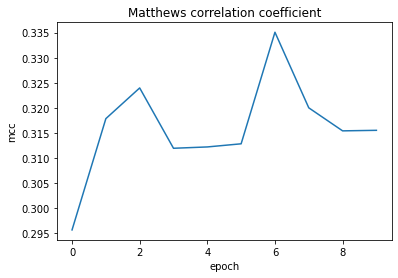

In [80]:
plt.plot(history['mcc'])
plt.title('Matthews correlation coefficient')
plt.ylabel('mcc')
plt.xlabel('epoch')
# plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [81]:
#Compute the Matthews correlation coefficient (MCC).

# The Matthews correlation coefficient is used in machine learning as a measure of the quality of binary and multiclass classifications. It takes into account true and false positives and negatives and is generally regarded as a balanced measure which can be used even if the classes are of very different sizes. The MCC is in essence a correlation coefficient value between -1 and +1. A coefficient of +1 represents a perfect prediction, 0 an average random prediction and -1 an inverse prediction. The statistic is also known as the phi coefficient. [source: Wikipedia]